In [17]:
import requests
import json
from pprint import pprint
from config import api_key
import random
from citipy import citipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [18]:
df = pd.DataFrame()
lat = []
lng = []
for x in range(0,1700): #get 700 random numbers
    lat.append(random.randint(-90,90)) #random number from range -90 to 90
    lng.append(random.randint(-180,180)) #random number from range -180 to 180
df["Lat"] = lat
df["Lng"] = lng
df["City Name"] = ''
df["Country"] = ''
df.head()
df.count()
   

Lat          1700
Lng          1700
City Name    1700
Country      1700
dtype: int64

In [19]:
for index,row in df.iterrows():
    city = citipy.nearest_city(row["Lat"],row["Lng"])
    if " " in city.city_name:
        city.city_name = city.city_name.replace(" ", "%20") 
    df.set_value(index,"City Name",city.city_name)
    df.set_value(index,"Country",city.country_code)
    df["Temp"]=''
df = df.drop_duplicates(["City Name","Country"])#drop the duplicate values
df["Humidity"]=''
df["Cloudiness"]=''
df["Wind Speed"]=''
df.head()
df.count()

Lat           641
Lng           641
City Name     641
Country       641
Temp          641
Humidity      641
Cloudiness    641
Wind Speed    641
dtype: int64

In [22]:
cities = df["City Name"].tolist()
settings = {"units":"imperial","appid":api_key}
responses=[]
query = ["main.temp"]
urls = []
print("Beginning Data Retrieval:")
print("-----------------------------")
record = 1
for index,row in df.iterrows():
    url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={api_key}&q={row['City Name']},{row['Country']}"
    print(f"Processing record {record}: {row['City Name']}, {row['Country']}")
    print(url)
    responses = requests.get(url).json()
    record += 1
    try:
        df.set_value(index,"Lat",responses["coord"]["lat"])
        df.set_value(index,"Lng",responses["coord"]["lon"])
        df.set_value(index,"Temp",responses["main"]["temp"])
        df.set_value(index,"Humidity",responses["main"]["humidity"])
        df.set_value(index,"Cloudiness",responses["clouds"]["all"])
        df.set_value(index,"Wind Speed",responses["wind"]["speed"])
        df.set_value(index, "City Name",responses["name"])
    except KeyError:
        df.set_value(index,"Temp",np.nan)


df.head()

        

    
  

Beginning Data Retrieval:
-----------------------------
Processing record 1: East London, za
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=East London,za
Processing record 2: Hermanus, za
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=Hermanus,za
Processing record 3: Luderitz, na
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=Luderitz,na
Processing record 4: Carlsbad, us
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=Carlsbad,us
Processing record 5: Le Port, re
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=Le Port,re
Processing record 6: barentsburg, sj
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=barentsburg,sj
Processing record 7: Kavieng, pg
http://

Processing record 55: bluff, nz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=bluff,nz
Processing record 56: tasiilaq, gl
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=tasiilaq,gl
Processing record 57: dongobesh, tz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=dongobesh,tz
Processing record 58: wyndham, nz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=wyndham,nz
Processing record 59: thompson, ca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=thompson,ca
Processing record 60: opuwo, na
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=opuwo,na
Processing record 61: pangnirtung, ca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7

Processing record 108: mahebourg, mu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=mahebourg,mu
Processing record 109: carambei, br
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=carambei,br
Processing record 110: ostersund, se
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=ostersund,se
Processing record 111: murmansk, ru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=murmansk,ru
Processing record 112: upernavik, gl
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=upernavik,gl
Processing record 113: hamilton, bm
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=hamilton,bm
Processing record 114: zhigansk, ru
http://api.openweathermap.org/data/2.5/weather?units

Processing record 163: namibe, ao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=namibe,ao
Processing record 164: pangai, to
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=pangai,to
Processing record 165: tambacounda, sn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=tambacounda,sn
Processing record 166: abu%20jubayhah, sd
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=abu%20jubayhah,sd
Processing record 167: severo-kurilsk, ru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=severo-kurilsk,ru
Processing record 168: tuktoyaktuk, ca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=tuktoyaktuk,ca
Processing record 169: hambantota, lk
http://api.openweathermap.or

Processing record 217: port-gentil, ga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=port-gentil,ga
Processing record 218: druskininkai, lt
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=druskininkai,lt
Processing record 219: emerald, au
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=emerald,au
Processing record 220: mastic%20beach, us
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=mastic%20beach,us
Processing record 221: perelyub, ru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=perelyub,ru
Processing record 222: bathsheba, bb
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=bathsheba,bb
Processing record 223: hesla, in
http://api.openweathermap.org/data/

Processing record 272: uspenka, ru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=uspenka,ru
Processing record 273: crateus, br
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=crateus,br
Processing record 274: erzin, ru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=erzin,ru
Processing record 275: teya, ru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=teya,ru
Processing record 276: nemuro, jp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=nemuro,jp
Processing record 277: tshela, cd
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=tshela,cd
Processing record 278: nishihara, jp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba

Processing record 326: boueni, yt
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=boueni,yt
Processing record 327: mount%20gambier, au
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=mount%20gambier,au
Processing record 328: akdepe, tm
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=akdepe,tm
Processing record 329: ancud, cl
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=ancud,cl
Processing record 330: robertsport, lr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=robertsport,lr
Processing record 331: nizhneyansk, ru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=nizhneyansk,ru
Processing record 332: ciudad%20guayana, ve
http://api.openweathermap.org/data/2.5

Processing record 380: narsaq, gl
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=narsaq,gl
Processing record 381: quelimane, mz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=quelimane,mz
Processing record 382: amahai, id
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=amahai,id
Processing record 383: takoradi, gh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=takoradi,gh
Processing record 384: zipaquira, co
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=zipaquira,co
Processing record 385: cockburn%20town, bs
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=cockburn%20town,bs
Processing record 386: veraval, in
http://api.openweathermap.org/data/2.5/weather?un

Processing record 434: crab%20hill, bb
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=crab%20hill,bb
Processing record 435: tubmanburg, lr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=tubmanburg,lr
Processing record 436: krasnoselkup, ru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=krasnoselkup,ru
Processing record 437: warwick, au
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=warwick,au
Processing record 438: orlovskiy, ru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=orlovskiy,ru
Processing record 439: alcamo, it
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=alcamo,it
Processing record 440: kailua, us
http://api.openweathermap.org/data/2.5/weather

Processing record 488: brigantine, us
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=brigantine,us
Processing record 489: cravo%20norte, co
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=cravo%20norte,co
Processing record 490: vadso, no
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=vadso,no
Processing record 491: poum, nc
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=poum,nc
Processing record 492: lubango, ao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=lubango,ao
Processing record 493: atar, mr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=atar,mr
Processing record 494: oktyabrskoye, ru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&AP

Processing record 543: peace%20river, ca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=peace%20river,ca
Processing record 544: santa%20fe, cu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=santa%20fe,cu
Processing record 545: torbay, ca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=torbay,ca
Processing record 546: hertford, gb
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=hertford,gb
Processing record 547: grand%20gaube, mu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=grand%20gaube,mu
Processing record 548: nykobing, dk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=nykobing,dk
Processing record 549: ust-kamchatsk, ru
http://api.openweathermap.org/dat

Processing record 597: nykoping, se
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=nykoping,se
Processing record 598: sai%20buri, th
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=sai%20buri,th
Processing record 599: fort%20nelson, ca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=fort%20nelson,ca
Processing record 600: malwan, in
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=malwan,in
Processing record 601: ajdabiya, ly
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=ajdabiya,ly
Processing record 602: brae, gb
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=brae,gb
Processing record 603: asau, tv
http://api.openweathermap.org/data/2.5/weather?units=Imperia

,Lat,Lng,City Name,Country,Temp,Humidity,Cloudiness,Wind Speed
0,-33,27,East London,za,72.59,100,80,2.84
1,-34,19,Hermanus,za,63.18,91,76,5.64
2,-26,15,Luderitz,na,62.6,88,76,18.34
3,33,-117,Carlsbad,us,69.33,23,1,9.17
4,-20,55,Le Port,re,79.59,83,92,29.97


In [23]:
df_pd = df.dropna(how='any')
df_pd.head()


,Lat,Lng,City Name,Country,Temp,Humidity,Cloudiness,Wind Speed
0,-33,27,East London,za,72.59,100,80,2.84
1,-34,19,Hermanus,za,63.18,91,76,5.64
2,-26,15,Luderitz,na,62.6,88,76,18.34
3,33,-117,Carlsbad,us,69.33,23,1,9.17
4,-20,55,Le Port,re,79.59,83,92,29.97


In [24]:
print(df_pd.count())
df_pd.to_csv("Output.csv",index = False)

Lat           553
Lng           553
City Name     553
Country       553
Temp          553
Humidity      553
Cloudiness    553
Wind Speed    553
dtype: int64


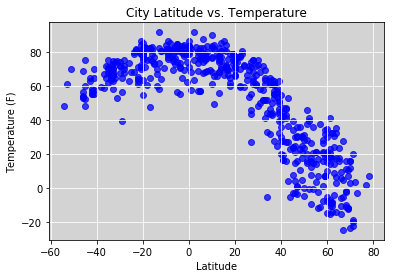

In [25]:
plt.scatter(df_pd["Lat"],df_pd["Temp"],color="blue",alpha = "0.75")
plt.title("City Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(True,color = "white")
plt.rcParams['axes.facecolor'] = 'lightgrey'
plt.show()

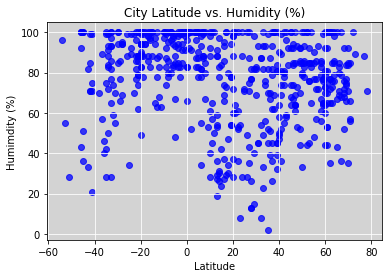

In [26]:
plt.scatter(df_pd["Lat"],df_pd["Humidity"],color="blue",alpha = "0.75")
plt.title("City Latitude vs. Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humimdity (%)")
plt.grid(True,color = "white")
plt.rcParams['axes.facecolor'] = 'lightgrey'
plt.show()

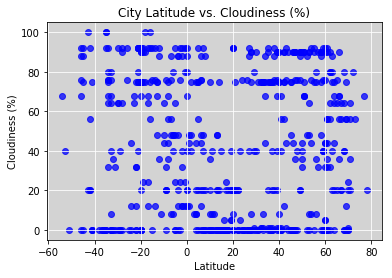

In [27]:
plt.scatter(df_pd["Lat"],df_pd["Cloudiness"],color="blue",alpha = "0.75")
plt.title("City Latitude vs. Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True,color = "white")
plt.rcParams['axes.facecolor'] = 'lightgrey'
plt.show()

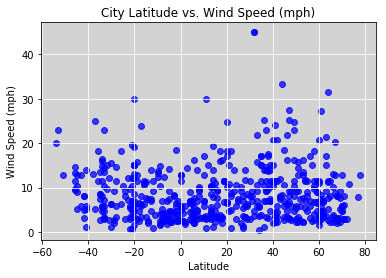

In [28]:
plt.scatter(df_pd["Lat"],df_pd["Wind Speed"],color="blue",alpha = "0.75")
plt.title("City Latitude vs. Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True,color = "white")
plt.rcParams['axes.facecolor'] = 'lightgrey'
plt.show()